In [1]:
!git clone https://github.com/NPre1393/pr2

Cloning into 'pr2'...
remote: Enumerating objects: 542, done.
remote: Counting objects: 100% (542/542), done.
remote: Compressing objects: 100% (373/373), done.
remote: Total 1871 (delta 288), reused 398 (delta 158), pack-reused 1329
Receiving objects: 100% (1871/1871), 64.65 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (614/614), done.


In [2]:
%cd pr2/testing_pipeline/gc_testing
!pwd

/content/pr2/testing_pipeline/gc_testing
/content/pr2/testing_pipeline/gc_testing


In [3]:
import apps.data_generator as dg
from apps.algorithm_loader import Algorithm_Loader

# Dependency anomaly

function gen_dep_anom_data() generates a dataset with dependency anomaly structure <br>
-> structure of time series dependency changes after some time t <br>
> n1 is the nr of timepoints generated with structure dependencies\['dep1'\] <br>
> n2 is the nr of timepoints generated with structure dependencies\['dep2'\] <br>

In order to control the randomness of the dependency structure one can specify the following variables: 
> lag: number of time steps in the past influence current t of generated ts <br>
> dep_dens: changes the density of ts influencing a generated ts in % (how many ts granger cause a ts) <br>
> coeff_min: VAR beta parameter regulates strength of influence <br>
> coeff_max: beta parameters are generated btw min and coeff_max <br>
> caused_ts: how many ts should be generated from the rest of the ts




In [4]:
ds = dg.dataset(features=10,n=300,lag=3,dep_dens=0.6)
ds.gen_dep_anom_data(n1=200,n2=100)

print(ds.data.shape)
print(type(ds.data))
print(ds)

(300, 10)
<class 'pandas.core.frame.DataFrame'>
Dataset Information
Features = 10, Lag = 3, n = 300
dists = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
dependencies:
dep1:
   0  1  2  3  4  5  6  7  8  9
0  0  0  0  1  0  0  1  0  1  1
1  0  0  0  0  0  1  1  1  1  0
2  0  0  0  1  1  0  1  0  1  0
3  0  0  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  0  0
5  0  0  0  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  0  0  0
7  0  0  0  0  0  0  0  0  0  0
8  0  0  0  0  0  0  0  0  0  0
9  0  0  0  0  0  0  0  0  0  0
dep2:
   0  1  2  3  4  5  6  7  8  9
0  0  0  0  1  0  1  0  1  0  1
1  0  0  0  1  1  0  1  1  0  0
2  0  0  0  1  1  1  0  0  1  0
3  0  0  0  0  0  0  0  0  0  0
4  0  0  0  0  0  0  0  0  0  0
5  0  0  0  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  0  0  0
7  0  0  0  0  0  0  0  0  0  0
8  0  0  0  0  0  0  0  0  0  0
9  0  0  0  0  0  0  0  0  0  0


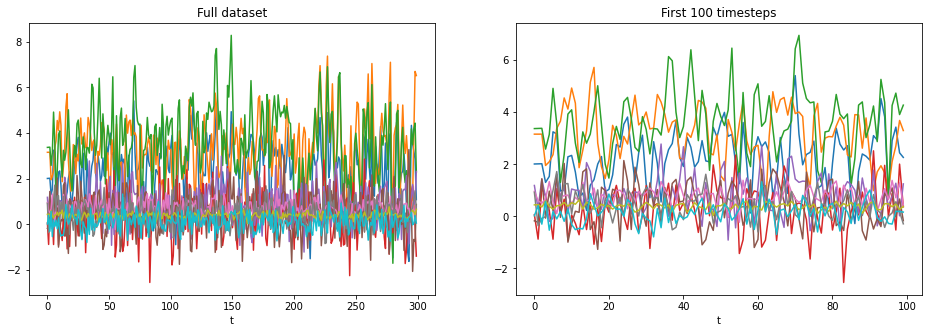

In [5]:
# simple plot of the dataset and first t=100 values
ds.plot_input()

Accuracy = 90.00%
Avg Precision = 76.33%
Avg Recall = 76.33%


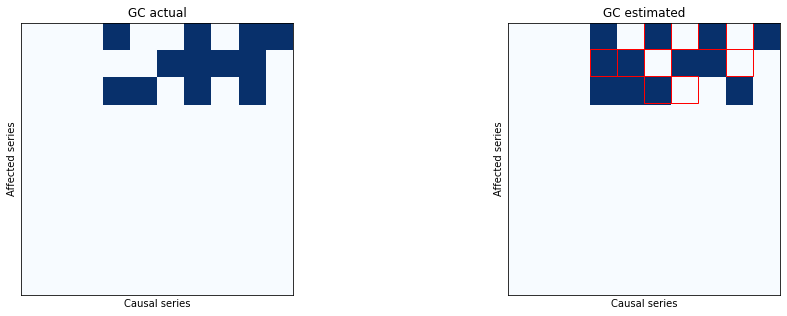

In [6]:
# variable GC is the granger-causality
ds.GC = ds.dependencies['dep1']
ds.plot_output_GC(ds.dependencies['dep2'])

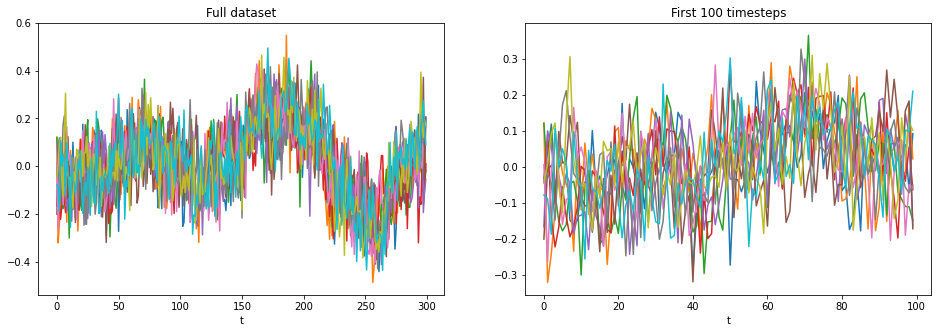

array([[0.15777921, 0.15777921, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15777921, 0.        ,
        0.15777921, 0.15777921, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15777921, 0.        ],
       [0.        , 0.15777921, 0.        , 0.        , 0.15777921,
        0.        , 0.15777921, 0.        , 0.        , 0.        ,
        0.        , 0.15777921, 0.        , 0.        , 0.15777921,
        0.        , 0.15777921, 0.        , 0.        , 0.        ],
       [0.        , 0.15777921, 0.15777921, 0.15777921, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.15777921, 0.15777921, 0.15777921, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.15777921, 0.        , 0.15777921, 0.        ,
        0.        , 0.15777921, 0.        , 0.        , 0.        ,
        0.        , 0.15777921, 0.        , 0

In [8]:
ds_var = dg.dataset()
ds_var.gen_var_data()
ds_var.plot_input()
ds_var.beta


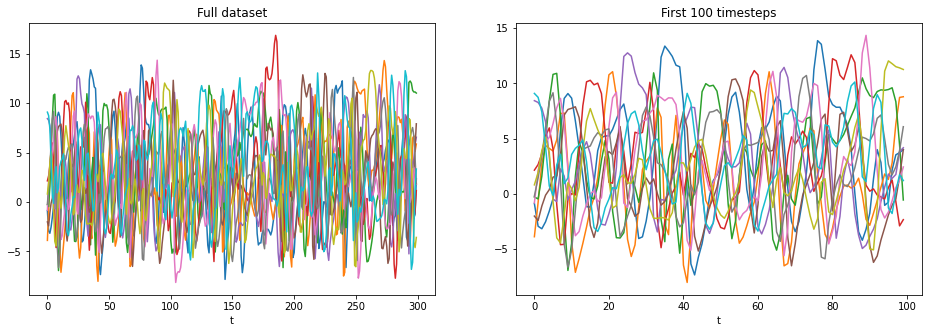

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,1
2,1,1,1,1,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0
5,0,0,0,1,1,1,1,0,0,0
6,0,0,0,0,1,1,1,1,0,0
7,0,0,0,0,0,1,1,1,1,0
8,0,0,0,0,0,0,1,1,1,1
9,1,0,0,0,0,0,0,1,1,1


In [10]:
ds_lorenz = dg.dataset()
ds_lorenz.gen_lorenz96_data()
ds_lorenz.plot_input()
ds_lorenz.dependencies['dep1']
